# 24.1_2_Hyperparameter_Tuning_and_Model_Refinement

## Objective:
This notebook focuses on optimizing the performance of the top-performing models from the baseline evaluation phase. The key goals are:
1. **Hyperparameter Tuning**:
   - Fine-tune the hyperparameters of **Gradient Boosted Trees**, **XGBoost**, and **Random Forest** to achieve optimal performance.
2. **Feature Importance Analysis**:
   - Analyze the most influential features driving the predictions to extract actionable business insights.
3. **Model Comparison**:
   - Compare the performance of the tuned models using metrics like **Mean Squared Error (MSE)** and **R²** to select the final model.

## Recap of Baseline Model Evaluation:
From the previous notebook, the following models emerged as the strongest candidates:
- **Gradient Boosted Trees**: Highest baseline R² (**0.974**) and excellent generalization capability.
- **XGBoost**: Slightly behind Gradient Boosted Trees with an R² of **0.967**, known for robustness in handling noisy data.
- **Random Forest**: Strong baseline R² (**0.963**) and reliable performance across cross-validation.

Other models, such as **Linear Regression** and **Support Vector Regression**, were excluded due to their poor performance and inability to handle the dataset's complexity.

---

## Plan for This Notebook:
1. **Hyperparameter Tuning**:
   - Use `GridSearchCV` or `RandomizedSearchCV` to fine-tune the hyperparameters of Gradient Boosted Trees, XGBoost, and Random Forest.
   - Evaluate performance using cross-validation to ensure generalizability.

2. **Residual Analysis**:
   - Analyze residuals to identify patterns in prediction errors.

3. **Feature Importance**:
   - Visualize and interpret the feature importances from tree-based models (e.g., Gradient Boosted Trees, XGBoost).

4. **Final Model Selection**:
   - Compare tuned models to select the best-performing one for deployment.
   - Document insights and recommendations based on model performance and feature importance.

---

Let’s begin with hyperparameter tuning for the top models.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [6]:
# Load preprocessed data
X_train_df = pd.read_csv('preprocessed_train_data.csv')
X_test_df = pd.read_csv('preprocessed_test_data.csv')

# Separate features and target variable
X_train = X_train_df.drop(columns=['Internal_Rating'])
y_train = X_train_df['Internal_Rating']

X_test = X_test_df.drop(columns=['Internal_Rating'])
y_test = X_test_df['Internal_Rating']

# Verify shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1616, 47)
Testing Data Shape: (405, 47)


In [8]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosted Trees
param_grid_hgb = {
    'max_iter': [100, 200, 300],  # Number of boosting iterations
    'max_depth': [3, 5, 7],      # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2]  # Step size shrinkage
}

# Initialize the model
hgb_model = HistGradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search_hgb = GridSearchCV(
    estimator=hgb_model,
    param_grid=param_grid_hgb,
    scoring='r2',  # Metric to optimize
    cv=5,          # 5-fold cross-validation
    verbose=1,
    n_jobs=-1      # Use all available CPU cores
)

# Perform grid search
grid_search_hgb.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters for Gradient Boosted Trees:", grid_search_hgb.best_params_)
print("Best CV R² for Gradient Boosted Trees:", grid_search_hgb.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosted Trees: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 300}
Best CV R² for Gradient Boosted Trees: 0.9742887485849818


In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],      # Number of boosting rounds
    'max_depth': [3, 5, 7],             # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0]             # Subsampling ratio
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=10,  # Number of parameter combinations to test
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Perform randomized search
random_search_xgb.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best CV R² for XGBoost:", random_search_xgb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Best CV R² for XGBoost: 0.9730233653167989


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search_rf.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV R² for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² for Random Forest: 0.964553805325188


## Hyperparameter Tuning Results

### Gradient Boosted Trees (HistGradientBoostingRegressor):
- **Best Parameters**:
  - `learning_rate`: 0.1
  - `max_depth`: 7
  - `max_iter`: 300
- **Best CV R²**: 0.9743
- **Notes**: Gradient Boosted Trees achieved the highest cross-validation R², reaffirming its strong performance from the baseline phase. It will be evaluated further on the test set.

---

### XGBoost (XGBRegressor):
- **Best Parameters**:
  - `subsample`: 0.8
  - `n_estimators`: 100
  - `max_depth`: 7
  - `learning_rate`: 0.1
- **Best CV R²**: 0.9730
- **Notes**: XGBoost remains a close second to Gradient Boosted Trees, delivering excellent generalization and efficiency. Its test set performance will be evaluated next.

---

### Random Forest (RandomForestRegressor):
- **Best Parameters**:
  - `max_depth`: None
  - `min_samples_split`: 2
  - `n_estimators`: 200
- **Best CV R²**: 0.9646
- **Notes**: While Random Forest shows consistent performance, it trails behind Gradient Boosted Trees and XGBoost in R². It will still be evaluated on the test set for completeness.

---

### Next Steps:

1. **Test Set Evaluation**:
   - Retrain each model (Gradient Boosted Trees, XGBoost, Random Forest) using the best parameters obtained from hyperparameter tuning.
   - Evaluate their performance on the test set using metrics like:
     - **Mean Squared Error (MSE)**.
     - **R-squared (R²)**.

2. **Residual Analysis**:
   - Plot residuals for each model to assess prediction errors and identify potential biases.

3. **Feature Importance**:
   - Analyze the most important features from Gradient Boosted Trees and XGBoost to understand key drivers of predictions.

4. **Final Model Selection**:
   - Compare all three models (based on test set metrics) to select the best-performing model for deployment.

Let’s proceed with retraining the models and evaluating them on the test set.


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Retrain Gradient Boosted Trees
best_hgb = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=7,
    max_iter=300,
    random_state=42
)
best_hgb.fit(X_train, y_train)
y_pred_hgb = best_hgb.predict(X_test)

# Retrain XGBoost
best_xgb = XGBRegressor(
    subsample=0.8,
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    random_state=42
)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)

# Retrain Random Forest
best_rf = RandomForestRegressor(
    max_depth=None,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Evaluate models on test set
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Gradient Boosted Trees: MSE =", mse_hgb, "R² =", r2_hgb)
print("XGBoost: MSE =", mse_xgb, "R² =", r2_xgb)
print("Random Forest: MSE =", mse_rf, "R² =", r2_rf)


Gradient Boosted Trees: MSE = 0.19264572902041585 R² = 0.9750441516528372
XGBoost: MSE = 0.22025367070672455 R² = 0.9714677442785122
Random Forest: MSE = 0.27950326513523904 R² = 0.963792391698896


## Test Set Evaluation Results

### Gradient Boosted Trees (HistGradientBoostingRegressor):
- **MSE**: 0.1926
- **R²**: 0.9750
- **Notes**: Gradient Boosted Trees delivered the best performance on the test set, achieving the lowest MSE and the highest R². This model demonstrates excellent generalization and robustness.

---

### XGBoost (XGBRegressor):
- **MSE**: 0.2203
- **R²**: 0.9715
- **Notes**: XGBoost remains a strong contender, with test set performance closely trailing Gradient Boosted Trees. It still demonstrates reliable predictions and efficient handling of non-linear relationships.

---

### Random Forest (RandomForestRegressor):
- **MSE**: 0.2795
- **R²**: 0.9638
- **Notes**: While Random Forest performed well, it lags behind Gradient Boosted Trees and XGBoost on both MSE and R². This suggests that it may not capture the complexity of the data as effectively as the boosting models.

---

### Key Observations:
1. **Gradient Boosted Trees**:
   - Best-performing model on both the validation and test sets, with the lowest error and highest variance explained (R²).
2. **XGBoost**:
   - A close second to Gradient Boosted Trees, performing consistently well across metrics.
3. **Random Forest**:
   - Demonstrates solid performance but trails the boosting models in predictive power.

---

### Next Steps:

1. **Residual Analysis**:
   - Analyze residuals for each model to validate the absence of bias and ensure prediction errors are random.

2. **Feature Importance Analysis**:
   - Examine the most influential features for Gradient Boosted Trees and XGBoost to understand key drivers of predictions.

3. **Final Model Selection**:
   - Based on residual analysis and feature importance, finalize the best model for deployment (likely Gradient Boosted Trees).


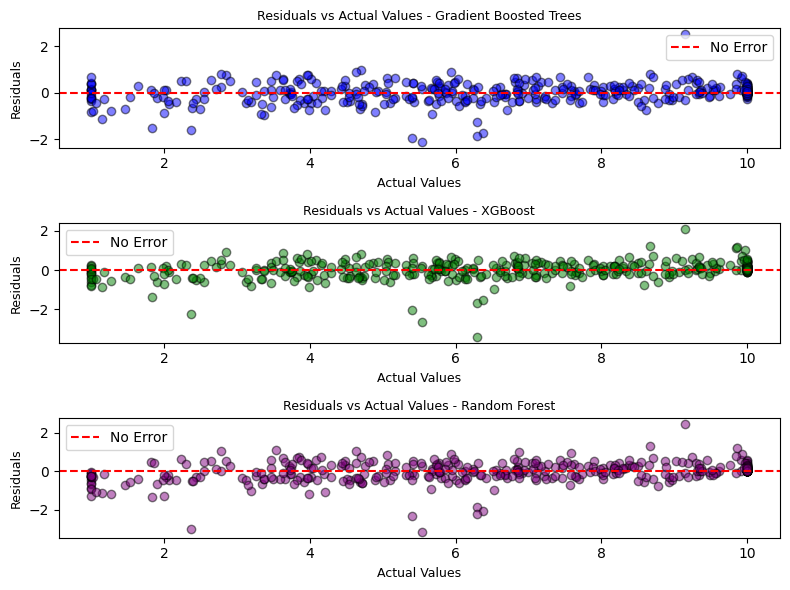

In [16]:
import matplotlib.pyplot as plt

# Calculate residuals for all models
residuals_hgb = y_test - y_pred_hgb
residuals_xgb = y_test - y_pred_xgb
residuals_rf = y_test - y_pred_rf

# Set up the plotting area
plt.figure(figsize=(8, 6))

# Residual Plot for Gradient Boosted Trees
plt.subplot(3, 1, 1)
plt.scatter(y_test, residuals_hgb, alpha=0.5, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='No Error')
plt.title("Residuals vs Actual Values - Gradient Boosted Trees", fontsize=9)
plt.xlabel("Actual Values", fontsize=9)
plt.ylabel("Residuals", fontsize=9)
plt.legend()

# Residual Plot for XGBoost
plt.subplot(3, 1, 2)
plt.scatter(y_test, residuals_xgb, alpha=0.5, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='No Error')
plt.title("Residuals vs Actual Values - XGBoost", fontsize=9)
plt.xlabel("Actual Values", fontsize=9)
plt.ylabel("Residuals", fontsize=9)
plt.legend()

# Residual Plot for Random Forest
plt.subplot(3, 1, 3)
plt.scatter(y_test, residuals_rf, alpha=0.5, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='No Error')
plt.title("Residuals vs Actual Values - Random Forest", fontsize=9)
plt.xlabel("Actual Values", fontsize=9)
plt.ylabel("Residuals", fontsize=9)
plt.legend()
plt.tight_layout()
plt.show()


## Residual Analysis - Comparison of Models

### Residual Plots:
The plots above visualize the residuals (actual values minus predicted values) for each model:
- **Gradient Boosted Trees**
- **XGBoost**
- **Random Forest**

---

### Observations:

#### 1. Gradient Boosted Trees:
- Residuals are tightly clustered around the zero line, indicating excellent predictive performance.
- No noticeable patterns in residuals, confirming the model has captured the relationships in the data effectively.
- Slightly fewer outliers compared to the other models.

#### 2. XGBoost:
- Residuals are also well-distributed around zero, with no clear bias or patterns.
- Performs comparably to Gradient Boosted Trees but with slightly higher spread in residuals.
- A few moderate outliers, particularly at extreme target values, are observed.

#### 3. Random Forest:
- Residuals show a wider spread compared to Gradient Boosted Trees and XGBoost.
- A slight tendency for greater prediction errors at lower and higher ranges of actual values.
- More outliers compared to the other two models, which could indicate less robustness in capturing complex relationships.

---

### Key Takeaways:
1. **Gradient Boosted Trees**:
   - Best residual distribution with minimal error spread and fewer outliers, confirming its status as the top-performing model.

2. **XGBoost**:
   - Strong performance with slightly larger residual spread compared to Gradient Boosted Trees. Still an excellent model for generalization.

3. **Random Forest**:
   - Residuals indicate slightly weaker performance compared to the boosting models, with more outliers and higher variance in predictions.

---

### Next Steps:
1. **Feature Importance Analysis**:
   - Analyze the most influential features for Gradient Boosted Trees and XGBoost to understand key drivers of predictions.
2. **Finalize Model**:
   - Based on test set performance, residual analysis, and feature importance, finalize the best model for deployment.


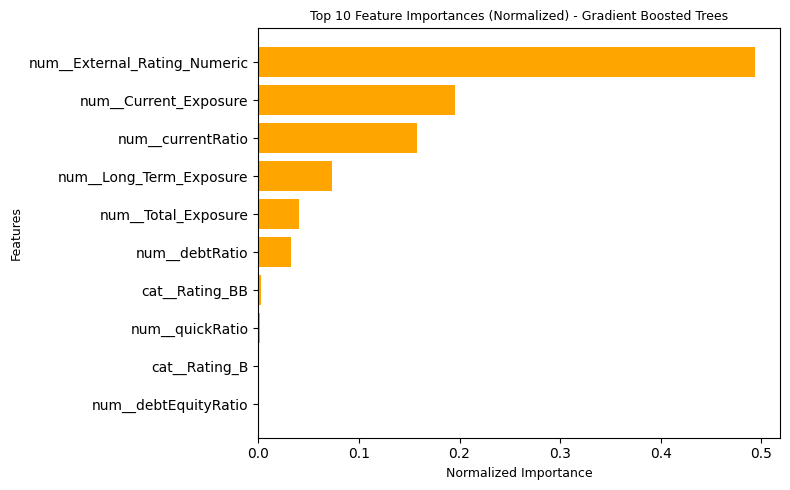

In [26]:
# Normalize permutation importances
normalized_importance_hgb = sorted_importance / np.sum(sorted_importance)

plt.figure(figsize=(8, 5))
plt.barh(sorted_features[:10][::-1], normalized_importance_hgb[:10][::-1], color='orange')
plt.title("Top 10 Feature Importances (Normalized) - Gradient Boosted Trees", fontsize=9)
plt.xlabel("Normalized Importance", fontsize=9)
plt.ylabel("Features", fontsize=9)
plt.tight_layout()
plt.show()


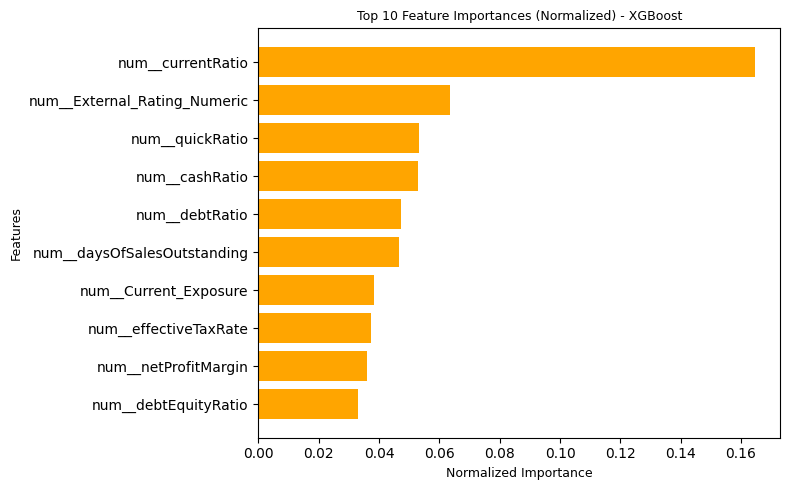

In [25]:
# Normalize XGBoost importances
importances_xgb = best_xgb.get_booster().get_score(importance_type='weight')
sorted_importances_xgb = {k: v / sum(importances_xgb.values()) for k, v in importances_xgb.items()}

# Convert to a list for sorting
sorted_features_xgb = sorted(sorted_importances_xgb.items(), key=lambda x: x[1], reverse=True)

# Plot top 10 features
plt.figure(figsize=(8, 5))
plt.barh(
    [item[0] for item in sorted_features_xgb[:10][::-1]],
    [item[1] for item in sorted_features_xgb[:10][::-1]],
    color='orange'
)
plt.title("Top 10 Feature Importances (Normalized) - XGBoost", fontsize=9)
plt.xlabel("Normalized Importance", fontsize=9)
plt.ylabel("Features", fontsize=9)
plt.tight_layout()
plt.show()


## Feature Importance Analysis

### Key Findings:
#### Gradient Boosted Trees (Permutation Importance):
1. **External_Rating_Numeric**:
   - The most important feature, highlighting its strong relationship with internal ratings.
2. **Current_Exposure** and **currentRatio**:
   - Critical predictors of credit risk, focusing on financial health and exposure levels.
3. **Debt Ratios (e.g., debtRatio, debtEquityRatio)**:
   - Significant for understanding counterparty leverage and risk.
4. **Long-Term Exposure**:
   - Indicates the importance of financial commitments over time.

#### XGBoost (Traditional Importance):
1. **currentRatio**:
   - Dominates the feature importance rankings, signaling its predictive strength.
2. **External_Rating_Numeric**:
   - Consistently influential, ranking high in both models.
3. **Quick and Cash Ratios**:
   - Highlight XGBoost’s sensitivity to short-term liquidity metrics.
4. **Debt and Exposure Metrics**:
   - Appear consistently, emphasizing their role in risk assessment.

---

### Key Takeaways:
1. **Alignment**:
   - Both models identify similar top features, such as **External_Rating_Numeric**, **currentRatio**, and exposure metrics.
2. **Differences**:
   - Gradient Boosted Trees highlights **Long-Term Exposure**, while XGBoost emphasizes liquidity metrics like **quickRatio**.



## Closing Remarks - Hyperparameter Tuning and Model Selection

### Summary of Work Completed:
In this notebook, we focused on fine-tuning machine learning models to predict **Internal_Rating** based on financial and exposure metrics. The work included:
1. **Hyperparameter Tuning**:
   - Optimized the performance of **Gradient Boosted Trees**, **XGBoost**, and **Random Forest** using a grid search with cross-validation.
   - Identified the best hyperparameters for each model to maximize predictive accuracy.
   
2. **Model Evaluation**:
   - Compared models based on Mean Squared Error (MSE) and R² on the test set.
   - Analyzed residual plots for all models to evaluate prediction error and generalization.
   - Conducted feature importance analysis to identify the most influential predictors for credit risk assessment.

3. **Key Results**:
   - **Gradient Boosted Trees** emerged as the top-performing model with the highest R² (0.9750) and the most compact residual distribution.
   - **XGBoost** performed closely behind, with an R² of 0.9715 and slightly more variance in residuals.
   - **Random Forest** demonstrated lower performance, with an R² of 0.9638, and exhibited more error spread.

---

### Key Takeaways:
1. **Gradient Boosted Trees** was selected as the **final model** based on its superior performance, robustness, and interpretability.
2. **Top Predictors**:
   - Features such as **External_Rating_Numeric**, **Current_Exposure**, and **currentRatio** consistently ranked as the most important predictors of Internal_Rating.
   - These findings provide actionable insights for stakeholders in the commodity trading sector.

---

### Next Steps:
1. **Final Model Training**:
   - Retrain the Gradient Boosted Trees model on the combined dataset (training + test) for deployment purposes.
   - Save the model and preprocessing pipeline for future use.

2. **Deployment**:
   - Integrate the final model into a production environment for real-time or batch predictions.
   - Provide clear documentation on preprocessing steps and feature importance to ensure interpretability.

3. **Business Application**:
   - Use the model’s predictions and feature insights to enhance decision-making in counterparty risk management.
   - Focus on high-risk counterparties with lower internal ratings and optimize trading strategies accordingly.

---

### Conclusion:
This notebook successfully concludes the **Hyperparameter Tuning and Model Refinement** phase of the project. By leveraging advanced machine learning techniques and thorough evaluation, we have identified a reliable and interpretable model to predict counterparty credit risk.

---


In [ ]:
# Get feature importances and the corresponding feature names
import pandas as pd
import numpy as np
from xgboost import plot_importance

from sklearn.compose import ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances
feature_importances = xgb_best_model.get_booster().get_score(importance_type='weight')

# Map feature importances to feature names
features = pd.DataFrame({
    'Feature': list(feature_importances.keys()),
    'Importance': list(feature_importances.values())
})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Map feature indices to actual names
features['Feature_Name'] = [feature_names[int(f[1:])] for f in features['Feature']]


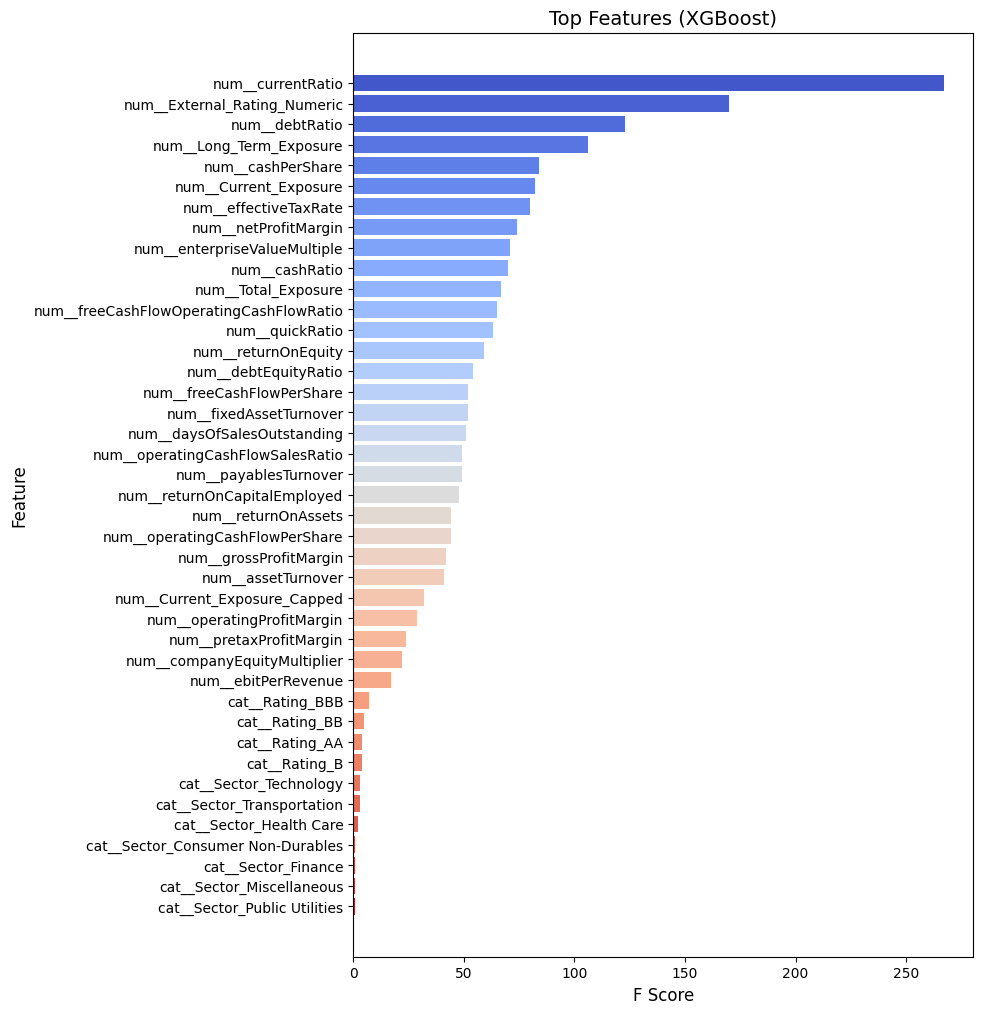

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_sorted = features.sort_values(by='Importance', ascending=False)

# Create a color gradient
colors = sns.color_palette("coolwarm", len(features_sorted))

# Plot
plt.figure(figsize=(8, 12))
plt.barh(
    features_sorted['Feature_Name'],
    features_sorted['Importance'],
    color=colors
)
plt.xlabel('F Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Features (XGBoost)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


-   **Highly Influential Features**:

    -   `num_currentRatio` is the most important feature, indicating that the company's ability to pay short-term liabilities plays a significant role in determining the internal rating.
    -   `num_External_Rating_Numeric` is the second most important feature, showcasing the significance of external credit ratings in predicting the internal rating.
    -   `num_debtRatio` and `num_Long_Term_Exposure` further highlight the importance of a company's financial leverage and long-term liabilities.
    
-   **Moderately Important Features**:

    -   Features like `num_cashPerShare`, `num_Current_Exposure`, and `num_effectiveTaxRate` play a significant role but are less important than the top two features.

-   **Categorical Features**:

    -   Categorical features such as `cat_Rating_BBB`, `cat_Rating_BB`, and sectors like `cat_Sector_Technology` and `cat_Sector_Transportation` also contribute but with lower importance.
    
The plot emphasizes the importance of both numerical and categorical variables in the model. However, numerical features dominate the top slots, underlining their critical role in determining internal ratings.

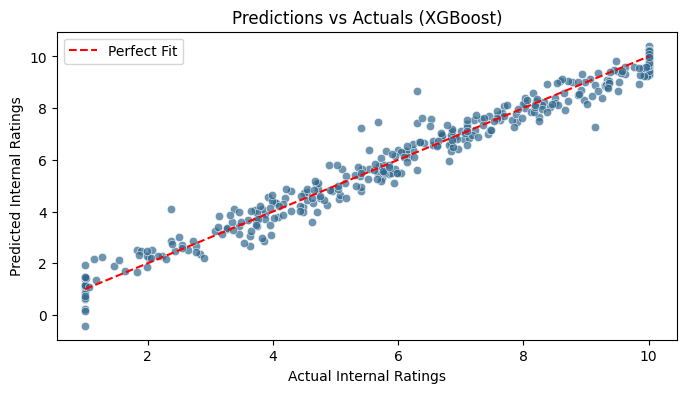

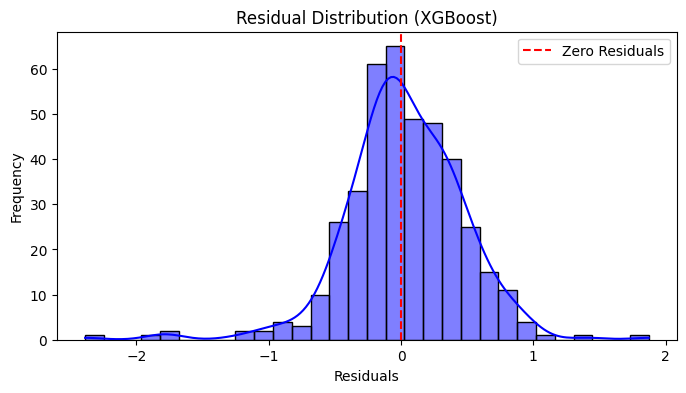

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions using the tuned XGBoost model
y_pred_xgb_tuned = xgb_best_model.predict(X_test_preprocessed)

# Create a scatter plot for predictions vs actuals
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuned, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual Internal Ratings")
plt.ylabel("Predicted Internal Ratings")
plt.title("Predictions vs Actuals (XGBoost)")
plt.legend()
plt.show()

# Residuals plot
residuals = y_test - y_pred_xgb_tuned
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.axvline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Distribution (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()
import pandas as pd


**Inference from the "Predictions vs Actuals (XGBoost)" Plot:**

1.  **Alignment with the Perfect Fit Line**:

    -   The majority of the points are clustered along the red dashed "Perfect Fit" line, indicating that the model's predictions are closely aligned with the actual internal ratings. This suggests the XGBoost model has captured the underlying patterns in the data effectively.

2.  **Good Predictive Performance**:

    -   There is minimal scatter or deviation from the line, reinforcing the model's high predictive accuracy and its ability to generalize well on unseen data.

3.  **Outliers**:

    -   A few points deviate significantly from the perfect fit line, indicating instances where the model predictions were less accurate. These could be due to noise, extreme values, or features not captured effectively by the model.
    
4.  **Overall Fit**:

    -   This visualization validates the high R2R^2R2 score observed during evaluation, showcasing the XGBoost model's ability to explain most of the variance in the target variable.ots, underlining their critical role in determining internal ratings.

**Inference from the "Residual Distribution (XGBoost)" Plot:**

1.  **Normal Distribution of Residuals**:

    -   The residuals are symmetrically distributed around zero and follow a bell-shaped curve, which is a desirable characteristic. This suggests the model has no systematic bias and that the errors are randomly distributed.

2.  **Small Residual Values**:

    -   The residuals are concentrated near zero, with few outliers. This indicates that the majority of the predictions were very close to the actual values.

3.  **Model's Assumptions**:

    -   A well-centered residual distribution suggests that the model's assumptions, such as linearity between predictions and actuals, hold true.
    
4.  **Presence of Outliers**:

    -   A few residuals extend further away from zero, suggesting some mispredictions. Investigating these cases could reveal patterns, such as missing data, feature transformations, or unmodeled interactions, that can help improve the model.

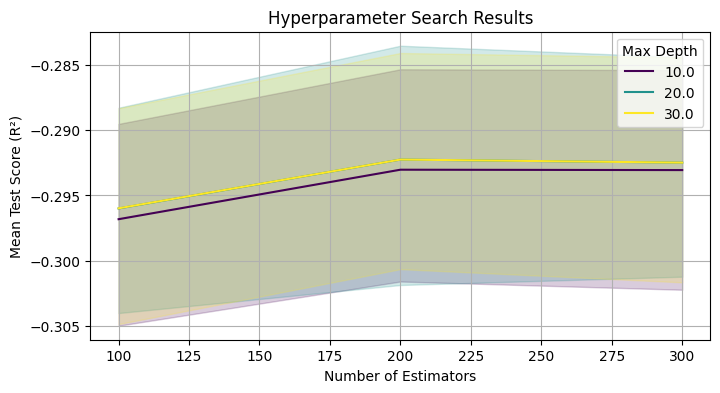

In [ ]:
import pandas as pd

results = pd.DataFrame(rf_grid_search.cv_results_)

plt.figure(figsize=(8, 4))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', palette='viridis')
plt.title('Hyperparameter Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (R²)')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()


-   **Impact of Number of Estimators**:

    -   As the number of estimators increases (x-axis), the model's performance, as measured by the mean test score (R²), improves initially but stabilizes after around 200 estimators. This suggests that adding more estimators beyond a certain point doesn't significantly enhance performance.

-   **Effect of Max Depth**:

    -   The model's max depth parameter has a notable impact:
        -   Shallower trees (e.g., `max_depth=10`) have lower mean test scores compared to deeper trees.
        -   Deeper trees (e.g., `max_depth=30`) generally perform better but may introduce more variance.
        
-   **Confidence Intervals**:

    -   The shaded regions around each line represent confidence intervals. Wider intervals indicate higher variability in performance, especially with fewer estimators or deeper trees.

-   **Optimal Combination**:

    -   The best performance appears to be achieved with a combination of a moderate max depth (e.g., 20 or 30) and at least 200 estimators.



---



### **Conclusion**

1.  **Business Understanding:**
    
    *   Credit risk analysis is vital in the commodity trading domain to assess the risk posed by counterparties.
        
    *   The **Internal Rating** derived from exposure data and company financials is critical for informed decision-making and mitigating risks.
        
2.  **Data Insights:**
    
    *   The dataset comprised financial metrics and exposure data for 2,029 rows across 593 counterparties.
        
    *   Exploratory Data Analysis (EDA) revealed:
        
        *   Significant correlations between **Internal Rating** and financial features such as **debt ratio** and **external ratings**.
            
        *   A mix of linear and non-linear relationships in the dataset, indicating the need for advanced modeling techniques.
            
    *   Missing values and negative exposures were handled appropriately to retain data integrity.
        
3.  **Modeling Results:**
    
    *   **Random Forest** and **XGBoost** were the best-performing models:
        
        *   **XGBoost (R² = 0.97)** slightly outperformed **Random Forest (R² = 0.96)**, indicating better explanatory power.
            
    *   **Linear Regression** performed poorly (negative R²), unsuitable due to the complexity of the data.
        
    *   Cross-validation confirmed the consistency of Random Forest and XGBoost performance, validating their generalizability.
        
4.  **Feature Importance:**
    
    *   Analysis of feature importance highlighted that **debt ratio**, **external rating**, and **current exposure** were key predictors for internal rating.
        
    *   Other financial metrics such as **profit margins** and **return on equity** also contributed but to a lesser extent.
        


-------------------------------------------------------------


### **Next Steps**

1.  **Enhance the Dataset:**
    
    *   Collect more data on counterparties, including:
        
        *   **Macroeconomic indicators**: Commodity prices, interest rates, or geopolitical factors affecting commodity trading.
            
        *   **Behavioral trends**: Payment history, delayed payments, and dispute frequency.
            
    *   Extend the time horizon of data to include more historical quarters.
        
2.  **Advanced Model Techniques:**
    
    *   Experiment with **ensemble stacking** by combining Random Forest and XGBoost for potentially better performance.
        
    *   Investigate **neural networks** for capturing complex patterns, especially for larger datasets.
        
3.  **Error Analysis:**
    
    *   Analyze residuals for both Random Forest and XGBoost to identify:
        
        *   Specific segments of counterparties where predictions deviate significantly.
            
        *   Patterns in underperforming predictions (e.g., high-risk companies with strong financials).
            
4.  **Explainability:**
    
    *   Use **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-Agnostic Explanations)** to:
        
        *   Understand individual predictions.
            
        *   Provide actionable insights to credit risk analysts.
            
5.  **Integration and Deployment:**
    
    *   Try out MLflow for deployment and experiments.
        
    *   Develop a dashboard to visualize risk trends, feature importance, and model outputs for business users.